In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams['font.sans-serif']=['STSong']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False 

In [31]:
df=pd.read_csv('ad_performance.txt',delimiter='\t')
df.tail(5)

渠道代号     日均UV   平均注册率   平均搜索量     访问深度   平均停留时间   订单转化率  投放总时间 素材类型 广告类型  \
884   A38  1777.75  0.0002  0.0023   1.2588   513.28  0.0002    5.0  swf   通栏   
885   A39  1953.53  0.0003  0.0026   1.1703   633.08  0.0002   16.0  swf   通栏   
886   A40   310.53  0.0002  0.0028   1.1546   543.80  0.0001   22.0  swf   通栏   
887   A41  1370.38  0.0001  0.0016   1.3939   613.32  0.0001   10.0  swf   通栏   
888  A826     0.86  0.0000  0.0000  52.6591  1932.61  0.0000   19.0  gif   暂停   

    合作方式     广告尺寸 广告卖点  
884  cpc  900*120   打折  
885  cpc  900*120   打折  
886  cpc  900*120   打折  
887  cpd  900*120   打折  
888  cpc  390*270   直降

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
渠道代号      889 non-null object
日均UV      889 non-null float64
平均注册率     889 non-null float64
平均搜索量     889 non-null float64
访问深度      889 non-null float64
平均停留时间    887 non-null float64
订单转化率     889 non-null float64
投放总时间     889 non-null float64
素材类型      889 non-null object
广告类型      889 non-null object
合作方式      889 non-null object
广告尺寸      889 non-null object
广告卖点      889 non-null object
dtypes: float64(7), object(6)
memory usage: 90.4+ KB


In [33]:
df.isnull().sum()

渠道代号      0
日均UV      0
平均注册率     0
平均搜索量     0
访问深度      0
平均停留时间    2
订单转化率     0
投放总时间     0
素材类型      0
广告类型      0
合作方式      0
广告尺寸      0
广告卖点      0
dtype: int64

In [34]:
df.describe()

日均UV       平均注册率       平均搜索量        访问深度       平均停留时间  \
count    889.000000  889.000000  889.000000  889.000000   887.000000   
mean     540.846772    0.001408    0.030493    2.167166   262.669188   
std     1634.410463    0.003291    0.106199    3.800528   224.364932   
min        0.060000    0.000000    0.000000    1.000000     1.640000   
25%        6.180000    0.000000    0.000600    1.392300   126.020000   
50%      114.180000    0.000000    0.003200    1.793100   236.550000   
75%      466.870000    0.001400    0.011800    2.216200   357.985000   
max    25294.770000    0.039100    1.037000   98.979900  4450.830000   

            订单转化率       投放总时间  
count  889.000000  889.000000  
mean     0.002852   16.052868  
std      0.011608    8.509435  
min      0.000000    1.000000  
25%      0.000000    9.000000  
50%      0.000200   16.000000  
75%      0.002000   24.000000  
max      0.216500   30.000000

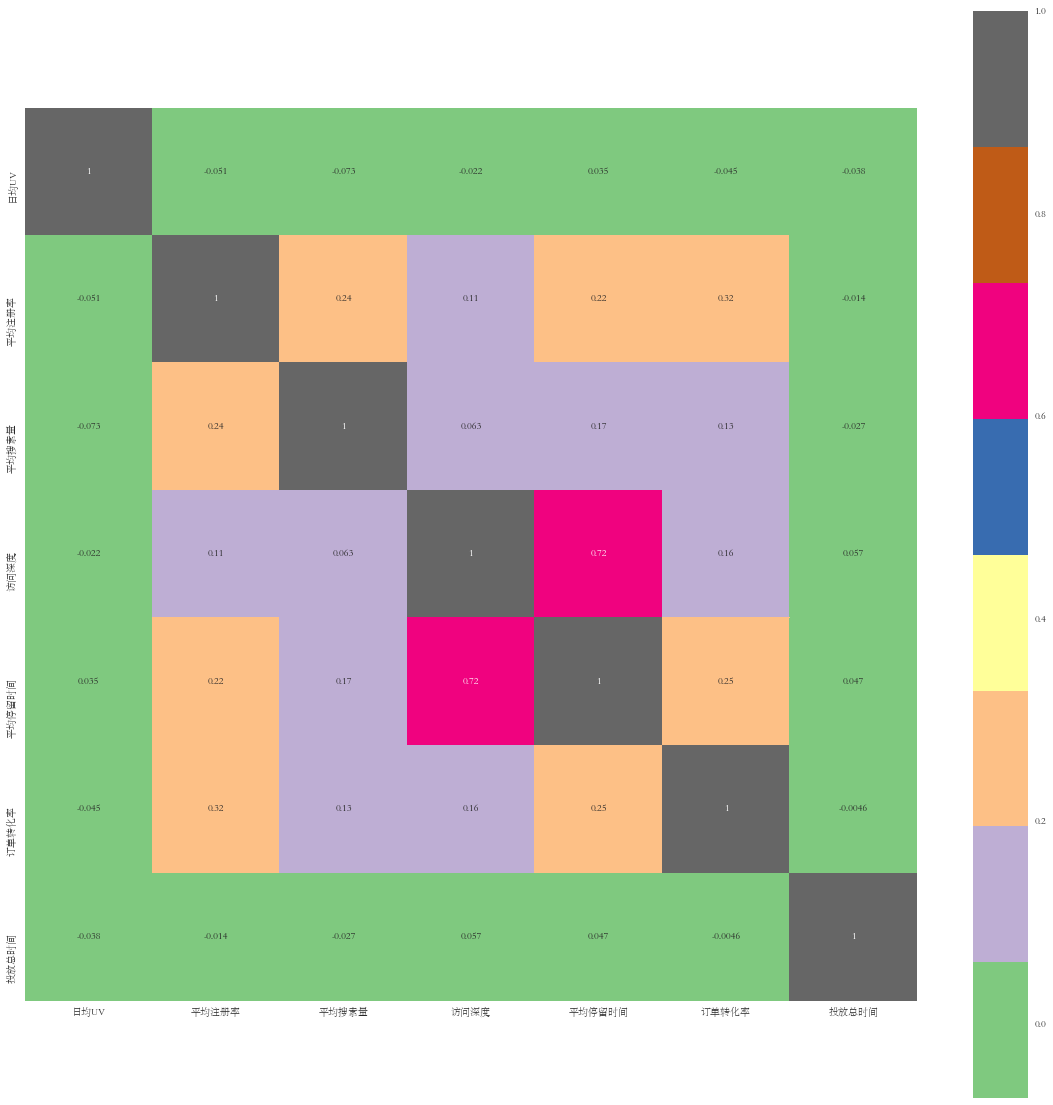

In [35]:
plt.figure(figsize=(20,20))
p=sns.heatmap(df.corr(),annot=True,square=True,cmap='Accent')
plt.show()

In [36]:
df['平均停留时间']=df['平均停留时间'].fillna(df['平均停留时间'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
渠道代号      889 non-null object
日均UV      889 non-null float64
平均注册率     889 non-null float64
平均搜索量     889 non-null float64
访问深度      889 non-null float64
平均停留时间    889 non-null float64
订单转化率     889 non-null float64
投放总时间     889 non-null float64
素材类型      889 non-null object
广告类型      889 non-null object
合作方式      889 non-null object
广告尺寸      889 non-null object
广告卖点      889 non-null object
dtypes: float64(7), object(6)
memory usage: 90.4+ KB


In [37]:
cover_cols=['素材类型','广告类型','合作方式','广告尺寸','广告卖点']
dummy_df=pd.get_dummies(df[cover_cols])
dummy_df

素材类型_gif  素材类型_jpg  素材类型_sp  素材类型_swf  广告类型_banner  广告类型_tips  广告类型_不确定  \
0           0         1        0         0            1          0         0   
1           0         1        0         0            1          0         0   
2           0         1        0         0            1          0         0   
3           0         1        0         0            1          0         0   
4           0         1        0         0            1          0         0   
..        ...       ...      ...       ...          ...        ...       ...   
884         0         0        0         1            0          0         0   
885         0         0        0         1            0          0         0   
886         0         0        0         1            0          0         0   
887         0         0        0         1            0          0         0   
888         1         0        0         0            0          0         0   

     广告类型_暂停  广告类型_横幅  广告类型_通栏  ...  广告尺寸_480*360  广告尺寸_600*90  广告尺寸_900*120  \
0          0        0        0  ...             0            0             0   
1          0        0        0  ...             0            0             0   
2          0        0        0  ...             0            0             0   
3          0        0        0  ...             0            0             0   
4          0        0        0  ...             0            0             0   
..       ...      ...      ...  ...           ...          ...           ...   
884        0        0        1  ...             0            0             1   
885        0        0        1  ...             0            0             1   
886        0        0        1  ...             0            0             1   
887        0        0        1  ...             0            0             1   
888        1        0        0  ...             0            0             0   

     广告尺寸_960*126  广告卖点_打折  广告卖点_满减  广告卖点_满赠  广告卖点_满返  广告卖点_直降  广告卖点_秒杀  
0               0        1        0        0        0        0        0  
1               0        0        1        0        0        0        0  
2               0        0        1        0        0        0        0  
3               0        0        1        0        0        0        0  
4               0        0        1        0        0        0        0  
..            ...      ...      ...      ...      ...      ...      ...  
884             0        1        0        0        0        0        0  
885             0        1        0        0        0        0        0  
886             0        1        0        0        0        0        0  
887             0        1        0        0        0        0        0  
888             0        0        0        0        0        1        0  

[889 rows x 28 columns]

In [38]:
df2=df.drop(cover_cols,axis=1)
df2=pd.concat([df2,dummy_df],axis=1)

In [39]:
df

渠道代号     日均UV   平均注册率   平均搜索量     访问深度   平均停留时间   订单转化率  投放总时间 素材类型  \
0    A203     3.69  0.0071  0.0214   2.3071   419.77  0.0258   20.0  jpg   
1    A387   178.70  0.0040  0.0324   2.0489   157.94  0.0030   19.0  jpg   
2    A388    91.77  0.0022  0.0530   1.8771   357.93  0.0026    4.0  jpg   
3    A389     1.09  0.0074  0.3382   4.2426   364.07  0.0153   10.0  jpg   
4    A390     3.37  0.0028  0.1740   2.1934   313.34  0.0007   30.0  jpg   
..    ...      ...     ...     ...      ...      ...     ...    ...  ...   
884   A38  1777.75  0.0002  0.0023   1.2588   513.28  0.0002    5.0  swf   
885   A39  1953.53  0.0003  0.0026   1.1703   633.08  0.0002   16.0  swf   
886   A40   310.53  0.0002  0.0028   1.1546   543.80  0.0001   22.0  swf   
887   A41  1370.38  0.0001  0.0016   1.3939   613.32  0.0001   10.0  swf   
888  A826     0.86  0.0000  0.0000  52.6591  1932.61  0.0000   19.0  gif   

       广告类型 合作方式     广告尺寸 广告卖点  
0    banner  roi   140*40   打折  
1    banner  cpc   140*40   满减  
2    banner  cpc   140*40   满减  
3    banner  cpc   140*40   满减  
4    banner  cpc   140*40   满减  
..      ...  ...      ...  ...  
884      通栏  cpc  900*120   打折  
885      通栏  cpc  900*120   打折  
886      通栏  cpc  900*120   打折  
887      通栏  cpd  900*120   打折  
888      暂停  cpc  390*270   直降  

[889 rows x 13 columns]

In [40]:
df2.tail().T

884      885     886      887      888
渠道代号              A38      A39     A40      A41     A826
日均UV          1777.75  1953.53  310.53  1370.38     0.86
平均注册率          0.0002   0.0003  0.0002   0.0001        0
平均搜索量          0.0023   0.0026  0.0028   0.0016        0
访问深度           1.2588   1.1703  1.1546   1.3939  52.6591
平均停留时间         513.28   633.08   543.8   613.32  1932.61
订单转化率          0.0002   0.0002  0.0001   0.0001        0
投放总时间               5       16      22       10       19
素材类型_gif            0        0       0        0        1
素材类型_jpg            0        0       0        0        0
素材类型_sp             0        0       0        0        0
素材类型_swf            1        1       1        1        0
广告类型_banner         0        0       0        0        0
广告类型_tips           0        0       0        0        0
广告类型_不确定            0        0       0        0        0
广告类型_暂停             0        0       0        0        1
广告类型_横幅             0        0       0        0        0
广告类型_通栏             1        1       1        1        0
合作方式_cpc            1        1       1        0        1
合作方式_cpd            0        0       0        1        0
合作方式_cpm            0        0       0        0        0
合作方式_roi            0        0       0        0        0
广告尺寸_140*40         0        0       0        0        0
广告尺寸_308*388        0        0       0        0        0
广告尺寸_390*270        0        0       0        0        1
广告尺寸_450*300        0        0       0        0        0
广告尺寸_480*360        0        0       0        0        0
广告尺寸_600*90         0        0       0        0        0
广告尺寸_900*120        1        1       1        1        0
广告尺寸_960*126        0        0       0        0        0
广告卖点_打折             1        1       1        1        0
广告卖点_满减             0        0       0        0        0
广告卖点_满赠             0        0       0        0        0
广告卖点_满返             0        0       0        0        0
广告卖点_直降             0        0       0        0        1
广告卖点_秒杀             0        0       0        0        0

In [43]:
scale_matrix=df2.iloc[:,1:8]
minmax_scaler=MinMaxScaler()
df2.iloc[:,1:8]=minmax_scaler.fit_transform(scale_matrix)
X=np.array(df2.iloc[:,1:])

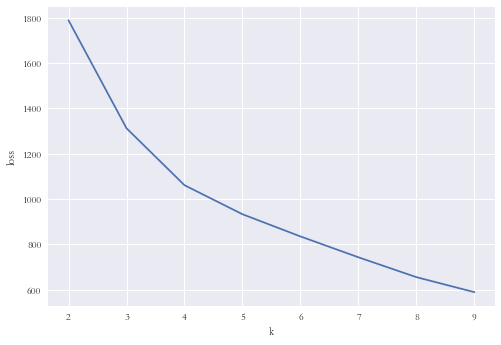

In [44]:
loss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i).fit(X)
    loss.append(model.inertia_)
plt.plot(range(2,10),loss)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

In [45]:
k=4
model=KMeans(n_clusters=k).fit(X)
df['clusters']=model.labels_
cluster_count=pd.DataFrame(df.clusters.value_counts()).rename(columns={'clusters':'counts'})

In [46]:
cluster_count['percentage']=(cluster_count['counts']/cluster_count['counts'].sum()).round(2)

In [47]:
cluster_count.head()

counts  percentage
0     381        0.43
1     276        0.31
2     157        0.18
3      75        0.08

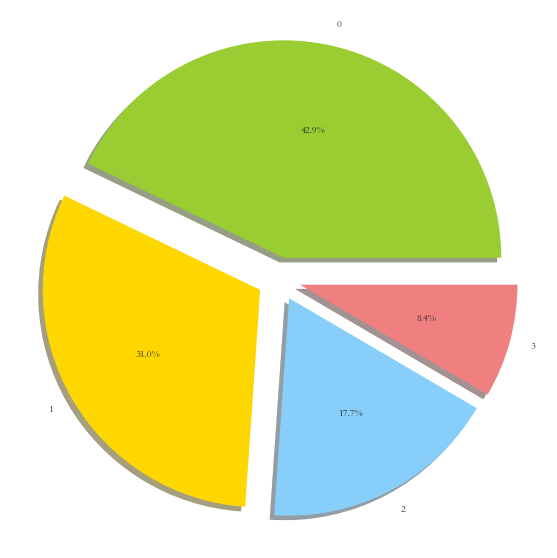

In [55]:
colors='yellowgreen','gold','lightskyblue','lightcoral'
explode=0.1,0.1,0.1,0.1
plt.figure(figsize=(10,10))
plt.pie(cluster_count.counts,explode=explode,labels=cluster_count.index,autopct='%1.1lf%%',colors=colors,shadow=True)
plt.show()

In [57]:
df.describe(include=['O'])#显示类别型数据

渠道代号 素材类型 广告类型 合作方式    广告尺寸 广告卖点
count    889  889  889  889     889  889
unique   889    4    6    4       8    6
top     A768  jpg  不确定  cpc  600*90   打折
freq       1  536  654  592     645  337

In [60]:
cluster_features=[]
for line in range(k):
    label_data=df[df['clusters']==line]
    part1_data=label_data.iloc[:,1:8]
    part1_desc=part1_data.describe().round(3)
    merge_data1=part1_desc.iloc[1,:]
    part2_data=label_data.iloc[:,8:-1]
    part2_desc=part2_data.describe(include='all')
    merge_data2=part2_desc.iloc[2,:]
    merge_line=pd.concat((merge_data1,merge_data2),axis=0)
    cluster_features.append(merge_line)
cluster_pd=pd.DataFrame(cluster_features)
all_cluster_set=cluster_count.join(cluster_pd).sort_index().T
all_cluster_set

0        1        2        3
counts          381      276      157       75
percentage     0.43     0.31     0.18     0.08
日均UV        311.403  598.991  600.153   1368.3
平均注册率         0.001    0.001    0.003    0.001
平均搜索量          0.02    0.051     0.02    0.032
访问深度          2.186    2.065    2.182    2.417
平均停留时间      233.569   267.77  242.058  434.877
订单转化率         0.002    0.004    0.003    0.002
投放总时间        15.593   17.033   15.669   15.587
素材类型            jpg      swf      jpg      swf
广告类型            不确定      不确定   banner     tips
合作方式            cpc      roi      cpc      cpc
广告尺寸         600*90   600*90  308*388  450*300
广告卖点             打折       打折       满减       打折